Графический метод решения задачи линейного программирования

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

count = 0 # подсчет количества неравенств-ограничений

print('Введите количество ограничений')
n = int(input())

cel = np.array([0, 0]) #массив для целевой функции
constr = np.zeros((n,4), dtype=int)
points = np.zeros((n,4), dtype=float)

print('Выберите тип уравнения(макс/мин?)')
extr = str(input())

print('Введите коеффициенты целевой функции')
for i in range(cel.size):
 cel[i]=int(input())

print('F = '+ str(cel[0]) + 'x'+' + ' + str(cel[1]) + 'y ->' + extr)
print(cel)
constr

for i in range(n):
    count+=1
    print("Введите коеффициенты " + str(count) + " неравенства")
    for j in range(4):
        constr[i][j]=int(input())

constr

Введите количество ограничений
3
Выберите тип уравнения(макс/мин?)
max
Введите коеффициенты целевой функции
2
3
F = 2x + 3y ->max
[2 3]
Введите коеффициенты 1 неравенства
8
-5
0
16
Введите коеффициенты 2 неравенства
-1
3
0
2
Введите коеффициенты 3 неравенства
2
7
0
9


array([[ 8, -5,  0, 16],
       [-1,  3,  0,  2],
       [ 2,  7,  0,  9]])

In [2]:
for i in range(n):
    res = float(constr[i][3]/constr[i][0]) #приравниваем к нулю Y
    res1 = float(constr[i][3]/constr[i][1]) #приравниваем к нулю X
    points[i][0] = res
    points[i][3] = res1
points

array([[ 2.        ,  0.        ,  0.        , -3.2       ],
       [-2.        ,  0.        ,  0.        ,  0.66666667],
       [ 4.5       ,  0.        ,  0.        ,  1.28571429]])

In [3]:
m1 = np.array([[constr[0][0],constr[0][1]], [constr[1][0], constr[1][1]]])
v1 = np.array([constr[0][3],constr[1][3]])

m2 = np.array([[constr[0][0],constr[0][1]], [constr[2][0], constr[2][1]]])
v2 = np.array([constr[0][3],constr[2][3]])

m3 = np.array([[constr[1][0],constr[1][1]], [constr[2][0], constr[2][1]]])
v3 = np.array([constr[1][3],constr[2][3]])

f_line = np.linalg.solve(m1,v1)
s_line = np.linalg.solve(m2,v2)
th_line = np.linalg.solve(m3,v3)

c = np.concatenate((f_line,s_line, th_line), axis=0)
b = c.reshape(-1, 2)

print(b)

[[3.05263158 1.68421053]
 [2.37878788 0.60606061]
 [1.         1.        ]]


In [58]:
def f_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()

    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    
def s_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()

    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    
    axes.plot(f_line[0],f_line[1], marker = 'o', color='orangered')
    axes.plot(s_line[0],s_line[1], marker = 'o', color='orangered')
    axes.plot(th_line[0],th_line[1], marker = 'o', color='orangered')
    axes.plot([2.0, 3.0], [0.0,0.0], color='red')

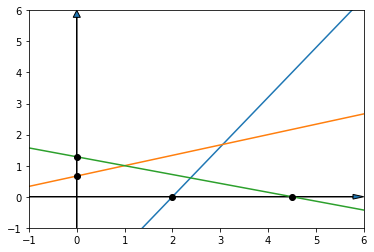

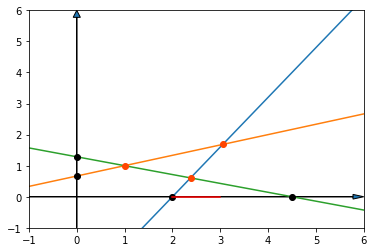

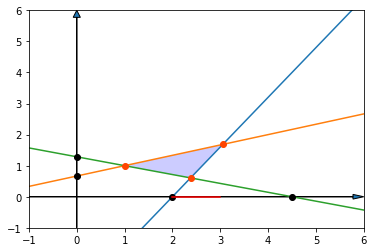

In [59]:
f_iter()
s_iter()
s_iter()
t1 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)
plt.gca().add_patch(t1)


In [31]:
print(b)

[[3.05263158 1.68421053]
 [2.37878788 0.60606061]
 [1.         1.        ]]


In [72]:
extrem = np.zeros(n, dtype=float)
for i in range(n):
    extrem[i] = cel[0]*b[i][0] + cel[1]*b[i][1]
extrem
if (extr == 'max'):
    answer = np.amax(extrem)
if (extr == 'min'):
    answer = numpy.amin(extrem)
extr
print("Значение целевой функции равно:" + str(answer))

Значение целевой функции равно:11.157894736842104
